In [75]:
from alpaca import ALPcouplings#, branching_ratio
#from alpaca.experimental_data.measurements_exp import babar_btoksnunu_lightmediator, belleII_bptoknunu_lightmediator
#from alpaca.models import model_library
#from alpaca.experimental_data.measurements_exp import belle_Y1S_mumu
#from alpaca.constants import metap, mmu, mtau, mc
#from alpaca.statistics.chisquared import chi2_obs, combine_chi2
#from alpaca.statistics.functions import nsigmas
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'text.usetex':True})

In [76]:
from alpaca.statistics.chisquared import get_chi2
from alpaca.statistics.functions import nsigmas

## Universal coupling $c_f=1$

In [77]:
get_couplings = np.vectorize(lambda ma, f: ALPcouplings({'cqL': 1.0, 'cuR':1.0, 'cdR':1.0,'clL':1.0, 'ceR':1.0}, scale=4*np.pi*f, basis='derivative_above').match_run(ma, 'kF_below'))

In [78]:
ma = np.linspace(0.103, 5.0, 10)
fa = np.logspace(1, 8, 10)
x_ma, y_fa = np.meshgrid(ma, fa)

In [79]:
transitions = [
    'B0 -> K*0 a',
    'B+ -> K+ a',
    'B+ -> K+ e e',
    'B0 -> K*0 e e',
    'B+ -> K+ mu mu',
    'B0 -> K*0 mu mu',
]

In [80]:
chi2 = get_chi2(transitions, x_ma, get_couplings(x_ma, y_fa), y_fa, integrator='no_rge')

KeyboardInterrupt: 

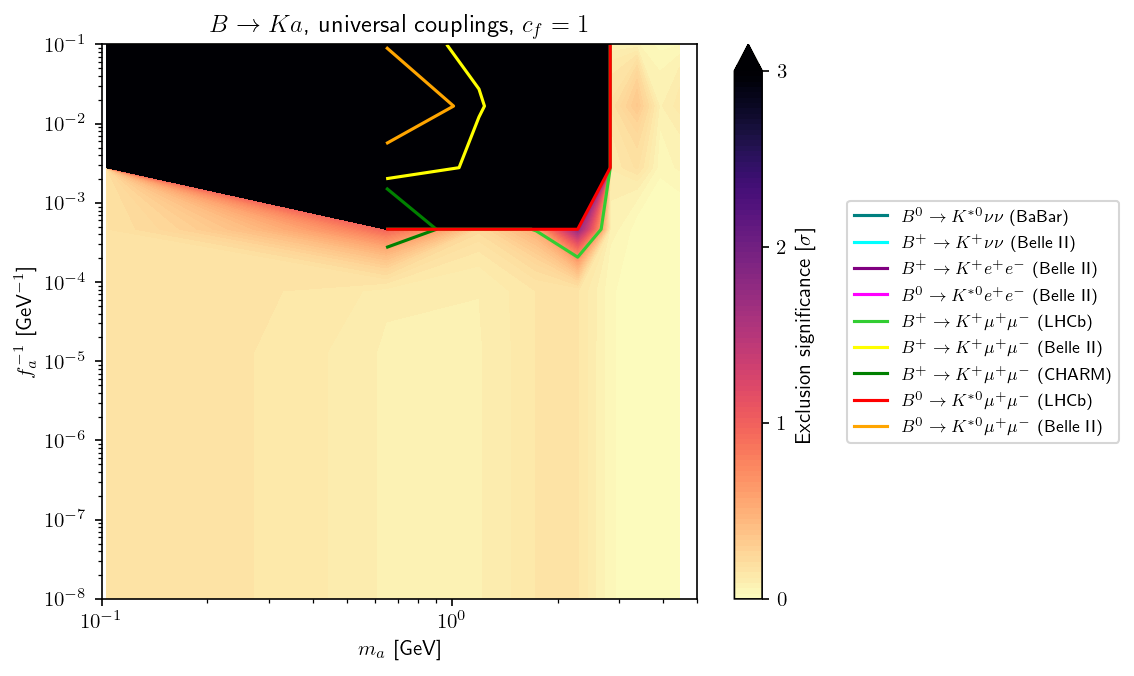

In [ ]:
plt.figure(dpi=150)
colors = {('B+ -> K+ a', 'Belle II'): 'cyan', ('B0 -> K*0 a', 'BaBar'): 'teal', ('B+ -> K+ e e', 'Belle II'): 'purple', ('B0 -> K*0 e e', 'Belle II'): 'magenta', ('B+ -> K+ mu mu', 'LHCb'): 'limegreen', ('B+ -> K+ mu mu', 'Belle II'): 'yellow', ('B+ -> K+ mu mu', 'CHARM'): 'green', ('B0 -> K*0 mu mu', 'LHCb'): 'red', ('B0 -> K*0 mu mu', 'Belle II'): 'orange'}
tex = {'B+ -> K+ a': r'$B^+ \to K^+ \nu \nu$', 'B0 -> K*0 a': r'$B^0 \to K^{*0} \nu \nu$', 'B+ -> K+ e e': r'$B^+ \to K^+ e^+ e^-$', 'B0 -> K*0 e e': r'$B^0 \to K^{*0} e^+ e^-$', 'B+ -> K+ mu mu': r'$B^+ \to K^+ \mu^+ \mu^-$', 'B0 -> K*0 mu mu': r'$B^0 \to K^{*0} \mu^+ \mu^-$'}
legend_elements = []
pl = plt.contourf(x_ma, 1/y_fa, nsigmas(chi2[('', 'Global')],2), levels=list(np.linspace(0, 3, 100)), cmap='magma_r', vmax=3, extend='max')
for observable, chi2_obs in chi2.items():
    if observable == ('', 'Global'):
        break
    plt.contour(x_ma, 1/y_fa, nsigmas(chi2_obs, 2), levels=[2], colors = colors[observable])
    legend_elements.append(plt.Line2D([0], [0], color=colors[observable], label=tex[observable[0]] + ' (' + observable[1] + ')'))
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
cb = plt.colorbar(pl, extend='max')
cb.set_label(r'Exclusion significance [$\sigma$]')
cb.set_ticks([0, 1, 2, 3])
plt.xlabel(r'$m_a$ [GeV]')
plt.ylabel(r'$f_a^{-1}$ [GeV$^{-1}$]')
plt.xlim(0.1, 5)
plt.title(r'$B \to K a$, universal couplings, $c_f=1$')
plt.legend(handles = legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=9, fontsize=8)

## Universal coupling $c_{quark}=1$

In [81]:
get_couplings = np.vectorize(lambda ma, f: ALPcouplings({'cqL': 1.0, 'cuR':1.0, 'cdR':1.0}, scale=4*np.pi*f, basis='derivative_above').match_run(ma, 'kF_below'))

In [82]:
ma = np.linspace(0.103, 5.0, 10)
fa = np.logspace(1, 8, 10)
x_ma, y_fa = np.meshgrid(ma, fa)

In [83]:
transitions = [
    'B0 -> K*0 a',
    'B+ -> K+ a',
    'B+ -> K+ e e',
    'B0 -> K*0 e e',
    'B+ -> K+ mu mu',
    'B0 -> K*0 mu mu',
]

In [84]:
chi2 = get_chi2(transitions, x_ma, get_couplings(x_ma, y_fa), y_fa, integrator='no_rge')

/Users/mfzaso/Documents/Projects/P02_BtoKmumu/Programs/alp-aca/alpaca/rge/classes.py:240: ComplexWarning: Casting complex values to real discards the imaginary part
  vals |= {'cg': float(array[53]), "cgamma": float(array[54])}
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2483: ComplexWarning: Casting complex values to real discards the imaginary part
  res = asanyarray(outputs, dtype=otypes[0])
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2483: ComplexWarning: Casting complex values to real discards the imaginary part
  res = asanyarray(outputs, dtype=otypes[0])
/Users/mfzaso/Documents/Projects/P02_BtoKmumu/Programs/alp-aca/alpaca/decays/mesons/invisible.py:20: RuntimeWarning: invalid value encountered in sqrt
  return mB**3*abs(gq_eff)**2/(64*np.pi) * f0_BK(ma**2)**2*np.sqrt(kallen(1, mK**2/mB**2, ma**2/mB**2))*(1-mK**2/mB**2)**2
/Library/Frameworks/

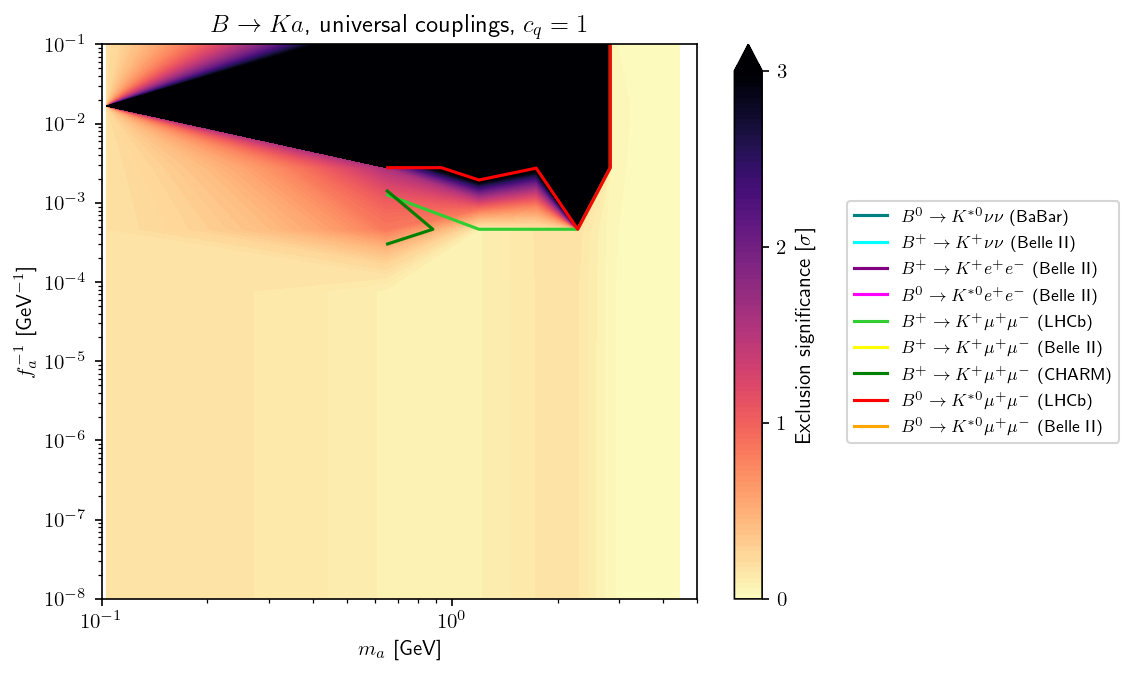

In [91]:
plt.figure(dpi=150)
colors = {('B+ -> K+ a', 'Belle II'): 'cyan', ('B0 -> K*0 a', 'BaBar'): 'teal', ('B+ -> K+ e e', 'Belle II'): 'purple', ('B0 -> K*0 e e', 'Belle II'): 'magenta', ('B+ -> K+ mu mu', 'LHCb'): 'limegreen', ('B+ -> K+ mu mu', 'Belle II'): 'yellow', ('B+ -> K+ mu mu', 'CHARM'): 'green', ('B0 -> K*0 mu mu', 'LHCb'): 'red', ('B0 -> K*0 mu mu', 'Belle II'): 'orange'}
tex = {'B+ -> K+ a': r'$B^+ \to K^+ \nu \nu$', 'B0 -> K*0 a': r'$B^0 \to K^{*0} \nu \nu$', 'B+ -> K+ e e': r'$B^+ \to K^+ e^+ e^-$', 'B0 -> K*0 e e': r'$B^0 \to K^{*0} e^+ e^-$', 'B+ -> K+ mu mu': r'$B^+ \to K^+ \mu^+ \mu^-$', 'B0 -> K*0 mu mu': r'$B^0 \to K^{*0} \mu^+ \mu^-$'}
legend_elements = []
pl = plt.contourf(x_ma, 1/y_fa, nsigmas(chi2[('', 'Global')],2), levels=list(np.linspace(0, 3, 100)), cmap='magma_r', vmax=3, extend='max')
for observable, chi2_obs in chi2.items():
    if observable == ('', 'Global'):
        break
    plt.contour(x_ma, 1/y_fa, nsigmas(chi2_obs, 2), levels=[2], colors = colors[observable])
    legend_elements.append(plt.Line2D([0], [0], color=colors[observable], label=tex[observable[0]] + ' (' + observable[1] + ')'))
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
cb = plt.colorbar(pl, extend='max')
cb.set_label(r'Exclusion significance [$\sigma$]')
cb.set_ticks([0, 1, 2, 3])
plt.xlabel(r'$m_a$ [GeV]')
plt.ylabel(r'$f_a^{-1}$ [GeV$^{-1}$]')
plt.xlim(0.1, 5)
plt.title(r'$B \to K a$, universal couplings, $c_q=1$')
plt.legend(handles = legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=9, fontsize=8)

## Universal coupling $c_{q}=1$, $c_{l}=-1$ relative sign

In [86]:
get_couplings = np.vectorize(lambda ma, f: ALPcouplings({'cqL': 1.0, 'cuR':1.0, 'cdR':1.0,'clL':-1.0, 'ceR':-1.0}, scale=4*np.pi*f, basis='derivative_above').match_run(ma, 'kF_below'))

In [87]:
ma = np.linspace(0.103, 5.0, 10)
fa = np.logspace(1, 8, 10)
x_ma, y_fa = np.meshgrid(ma, fa)

In [88]:
transitions = [
    'B0 -> K*0 a',
    'B+ -> K+ a',
    'B+ -> K+ e e',
    'B0 -> K*0 e e',
    'B+ -> K+ mu mu',
    'B0 -> K*0 mu mu',
]

In [89]:
chi2 = get_chi2(transitions, x_ma, get_couplings(x_ma, y_fa), y_fa, integrator='no_rge')

/Users/mfzaso/Documents/Projects/P02_BtoKmumu/Programs/alp-aca/alpaca/rge/classes.py:232: ComplexWarning: Casting complex values to real discards the imaginary part
  vals |= {'cg': float(array[45]), "cB": float(array[46]), 'cW': float(array[47])}
/Users/mfzaso/Documents/Projects/P02_BtoKmumu/Programs/alp-aca/alpaca/rge/classes.py:240: ComplexWarning: Casting complex values to real discards the imaginary part
  vals |= {'cg': float(array[53]), "cgamma": float(array[54])}
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2483: ComplexWarning: Casting complex values to real discards the imaginary part
  res = asanyarray(outputs, dtype=otypes[0])
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2483: ComplexWarning: Casting complex values to real discards the imaginary part
  res = asanyarray(outputs, dtype=otypes[0])
/Users/mfzaso/Documents/Projects/P02_BtoKmumu/

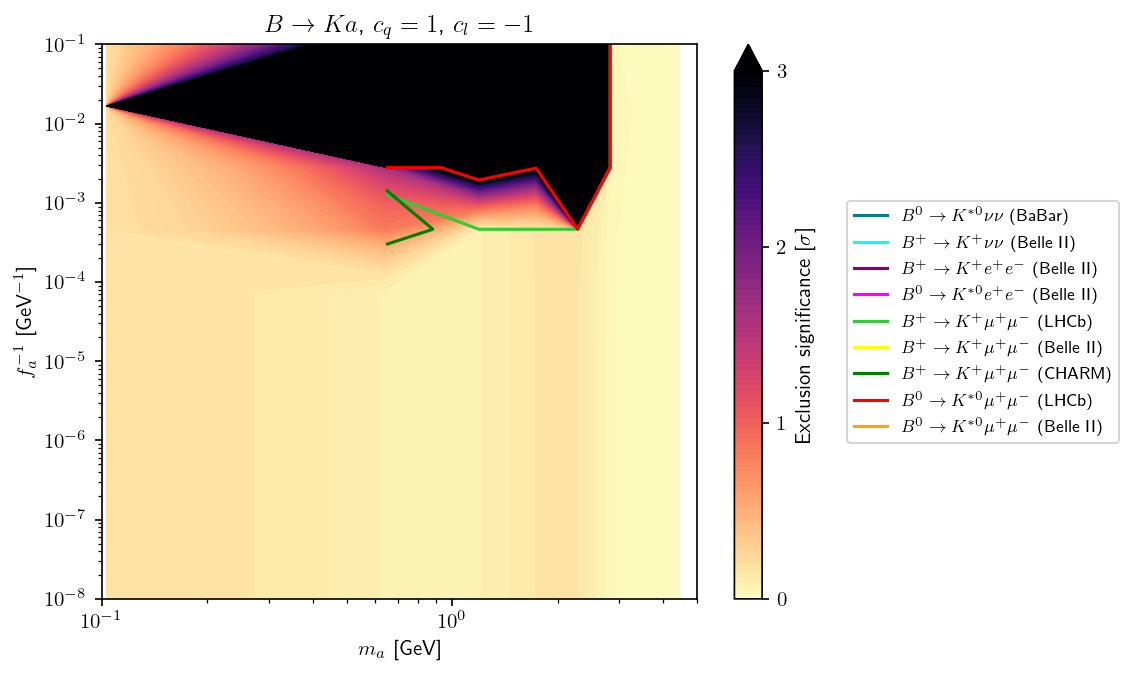

In [93]:
plt.figure(dpi=150)
colors = {('B+ -> K+ a', 'Belle II'): 'cyan', ('B0 -> K*0 a', 'BaBar'): 'teal', ('B+ -> K+ e e', 'Belle II'): 'purple', ('B0 -> K*0 e e', 'Belle II'): 'magenta', ('B+ -> K+ mu mu', 'LHCb'): 'limegreen', ('B+ -> K+ mu mu', 'Belle II'): 'yellow', ('B+ -> K+ mu mu', 'CHARM'): 'green', ('B0 -> K*0 mu mu', 'LHCb'): 'red', ('B0 -> K*0 mu mu', 'Belle II'): 'orange'}
tex = {'B+ -> K+ a': r'$B^+ \to K^+ \nu \nu$', 'B0 -> K*0 a': r'$B^0 \to K^{*0} \nu \nu$', 'B+ -> K+ e e': r'$B^+ \to K^+ e^+ e^-$', 'B0 -> K*0 e e': r'$B^0 \to K^{*0} e^+ e^-$', 'B+ -> K+ mu mu': r'$B^+ \to K^+ \mu^+ \mu^-$', 'B0 -> K*0 mu mu': r'$B^0 \to K^{*0} \mu^+ \mu^-$'}
legend_elements = []
pl = plt.contourf(x_ma, 1/y_fa, nsigmas(chi2[('', 'Global')],2), levels=list(np.linspace(0, 3, 100)), cmap='magma_r', vmax=3, extend='max')
for observable, chi2_obs in chi2.items():
    if observable == ('', 'Global'):
        break
    plt.contour(x_ma, 1/y_fa, nsigmas(chi2_obs, 2), levels=[2], colors = colors[observable])
    legend_elements.append(plt.Line2D([0], [0], color=colors[observable], label=tex[observable[0]] + ' (' + observable[1] + ')'))
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
cb = plt.colorbar(pl, extend='max')
cb.set_label(r'Exclusion significance [$\sigma$]')
cb.set_ticks([0, 1, 2, 3])
plt.xlabel(r'$m_a$ [GeV]')
plt.ylabel(r'$f_a^{-1}$ [GeV$^{-1}$]')
plt.xlim(0.1, 5)
plt.title(r'$B \to K a$, $c_q=1$, $c_l=-1$')
plt.legend(handles = legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=9, fontsize=8)